In [1]:
import uproot as up
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
def plot_stt(useGrayScale=False, alpha=1):

    # import the STT geometry data
    sttGeo = pd.read_csv(
        "/home/nikin105/mlProject/data/detectorGeometries/tubePos.csv",
        usecols=["x", "y", "skewed"],
    )

    posSkewedTubes = sttGeo.query("skewed == 1")
    negSkewedTubes = sttGeo.query("skewed == -1")
    straightTubes = sttGeo.query("skewed == 0")

    # Close all previous plots
    plt.close("all")

    # Set the general style of the plot using seaborn
    sns.set_theme()
    sns.set_style("ticks")
    sns.set_context("talk")

    pipeColors = sns.color_palette("pastel")

    if useGrayScale:
        posSkewedColor = pipeColors[7]
        negSkewedColor = pipeColors[7]
        straightColor = pipeColors[7]
    else:
        posSkewedColor = pipeColors[3]
        negSkewedColor = pipeColors[0]
        straightColor = pipeColors[2]

    # Create a figure and axis
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

    # Plot the positive skewed tubes
    ax.scatter(
        posSkewedTubes["x"],
        posSkewedTubes["y"],
        ec=posSkewedColor,
        fc="none",
        s=20,
        alpha=alpha,
        lw=1,
    )
    # Plot the negative skewed tubes
    ax.scatter(
        negSkewedTubes["x"],
        negSkewedTubes["y"],
        ec=negSkewedColor,
        fc="none",
        s=20,
        alpha=alpha,
        lw=1,
    )
    # Plot the straight tubes
    ax.scatter(
        straightTubes["x"],
        straightTubes["y"],
        ec=straightColor,
        fc="none",
        s=20,
        alpha=alpha,
        lw=1,
    )

    # Format the axes
    ax.set_xlabel("x [cm]")
    ax.set_ylabel("y [cm]")
    ax.set_aspect("equal")
    sns.despine(fig=fig, ax=ax, offset=10, trim=True)

    return fig, ax

In [3]:
data = up.open("/home/nikin105/mlProject/simulations/bashScripts/new_mum5mup5_0/root/new_mum5mup5_0_skew.root:pndsim")
data2 = up.open("/home/nikin105/mlProject/simulations/bashScripts/new_mum5mup5_0/root/new_mum5mup5_0_digi.root:pndsim")
data3 = up.open("/home/nikin105/mlProject/simulations/bashScripts/new_mum5mup5_0/root/new_mum5mup5_0_sim.root:pndsim")
data3["STTPoint"].keys()

['STTPoint.fUniqueID',
 'STTPoint.fBits',
 'STTPoint.fLink',
 'STTPoint.fTrackID',
 'STTPoint.fEventId',
 'STTPoint.fPx',
 'STTPoint.fPy',
 'STTPoint.fPz',
 'STTPoint.fTime',
 'STTPoint.fLength',
 'STTPoint.fELoss',
 'STTPoint.fDetectorID',
 'STTPoint.fX',
 'STTPoint.fY',
 'STTPoint.fZ',
 'STTPoint.fX_out_local',
 'STTPoint.fY_out_local',
 'STTPoint.fZ_out_local',
 'STTPoint.fX_in_local',
 'STTPoint.fY_in_local',
 'STTPoint.fZ_in_local',
 'STTPoint.fPx_out',
 'STTPoint.fPy_out',
 'STTPoint.fPz_out',
 'STTPoint.fMass',
 'STTPoint.fTubeID']

In [10]:
event = 2
x = data["STTCombinedSkewedHits/STTCombinedSkewedHits.fX"].array(library="np")[event]
y = data["STTCombinedSkewedHits/STTCombinedSkewedHits.fY"].array(library="np")[event]
x2 = data2["STTHit/STTHit.fX"].array(library="np")[event]
y2 = data2["STTHit/STTHit.fY"].array(library="np")[event]
x3 = data3["STTPoint/STTPoint.fX"].array(library="np")[event]
y3 = data3["STTPoint/STTPoint.fY"].array(library="np")[event]

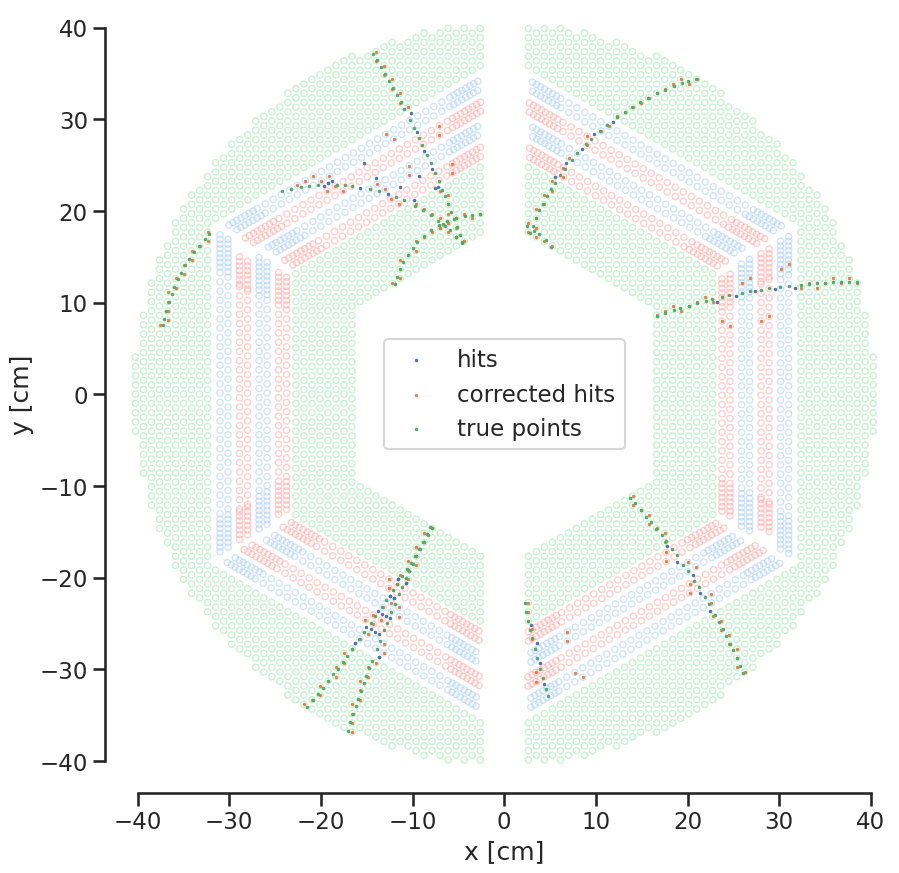

In [11]:
fig, ax = plot_stt(useGrayScale=False, alpha=0.5)
plt.scatter(x, y, s=1, label="hits")
plt.scatter(x2, y2, s=1, label="corrected hits")
plt.scatter(x3, y3, s=1, label="true points")
plt.xlim(-42, 42)
plt.ylim(-42, 42)
plt.legend()
plt.savefig(
    f"/home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/mum5mup5/digi/event/skewed_straw_corrected_{event}.pdf",
    dpi=300,
)
plt.savefig(
    f"/home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/mum5mup5/digi/event/skewed_straw_corrected_{event}.png",
    dpi=300,
)